In [41]:
# first we need to import the libraries we're going to use
# 'import x as y' will import package x but give it the alias 'y' so you don't have to type out x all the time

import matplotlib.pyplot as plt # for making nice plots
import sklearn as skl # for the machine learning bit!
import pandas as pd # for handling and transforming the data
import numpy as np # for useful numerical operations
#import graphviz # for visualizing our decision tree
#import lime # for visualizing tree model predictions

%matplotlib inline

## Part 0 - loading the data

In [4]:
df = pd.read_csv("../data/all.csv", encoding='latin1')

In [5]:
df.head(5)

,Reference Number,Easting,Northing,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle
0,3109,427890,430474,1,05-Jan-09,705,A,Wet / Damp,Darkness: street lights present and lit,Fine without high winds,Pedestrian,Serious,Male,18,Car
1,70609,439643,436962,3,28-Jan-09,1530,Unclassified,Wet / Damp,Daylight: street lights present,Fine without high winds,Driver,Serious,Male,75,Car
2,321309,437814,429825,3,25-Apr-09,1803,A,Dry,Daylight: street lights present,Fine without high winds,Driver,Serious,Male,39,Car
3,321309,437814,429825,3,25-Apr-09,1803,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Serious,Male,16,Car
4,321309,437814,429825,3,25-Apr-09,1803,A,Dry,Daylight: street lights present,Fine without high winds,Passenger,Serious,Male,12,Car


## Part 1 - cleaning the data (5-10 mins)

In [25]:
# people load the data and try to find three things that might cause problems for us
# valid answers: null values, mix of numerical and text category labels, data in wrong columns, not normalized

In [47]:
# categories to check

# decide which columns you can check contain the correct categories
columnsToCheck = ['1st Road Class', 'Road Surface', 'Lighting Conditions', 'Weather Conditions', 'Casualty Class',
                 'Casualty Severity', 'Sex of Casualty', 'Type of Vehicle']

# go through these columns and check that the values we have are expected
for column in columnsToCheck:
    valuesPresent = set(df[column].values)
    print("{} - {}".format(column, str(valuesPresent)))
    print("-------")

1st Road Class - {'A(M)', 'A', 'Unclassified', 'B', 'C', 'Motorway'}
-------
Road Surface - {nan, 'Flood (surface water over 3cm deep)', 'Snow', 'Wet / Damp', 'Frost/ Ice', '5', 'Flood', 'Frost / Ice', 'Dry'}
-------
Lighting Conditions - {'Darkness: street lights present and lit', 'Darkness: street lighting unknown', 'Daylight: street lights present', '5', 'Darkness: no street lighting', 'Darkness: street lights present but unlit'}
-------
Weather Conditions - {'Unknown', 'Snowing without high winds', 'Fine with high winds', 'Darkness: street lighting unknown', 'Snowing with high winds', 'Fog or mist \x96 if hazard', 'Raining with high winds', 'Raining without high winds', 'Fine without high winds', 'Other'}
-------
Casualty Class - {'Passenger', 'Driver', 'Pedestrian', 'Driver/Rider'}
-------
Casualty Severity - {'Slight', 'Fatal', 'Serious'}
-------
Sex of Casualty - {'Female', 'Male'}
-------
Type of Vehicle - {'Goods vehicle 7.5 tonnes mgw and over', 'Car', 'Motorcycle - Unknown C

In [50]:
# numerical columns - similar to above

numericalColumnsToCheck = []

# is everything a number? a sensible number?

## Part 1b - loading the dataset we've already prepared

In [14]:
# we'll be using this file from now on! It's been through the process of cleaning and preparing
df = pd.read_csv("../data/cleaned-with-latlng.csv", encoding='latin1')

## Part 2 - exploratory analysis (10 mins)

In [15]:
# have a look at distribution of slight/serious end cases

numSerious = len(df[df['Casualty Severity'] == 'Serious'])
print("There were {} serious accidents".format(numSerious))
numSerious = len(df[df['Casualty Severity'] == 'Slight'])
print("There were {} serious accidents".format(numSerious))

There were 2192 serious accidents
There were 16691 serious accidents


In [26]:
# want to get a feel for distributions of other features and possible relationships

count
Number of Vehicles Casualty Severity       
1                  Serious              998
                   Slight              3899
2                  Serious             1007
                   Slight             10516
3                  Serious              135
                   Slight              1671
4                  Serious               30
                   Slight               401
5                  Serious                9
                   Slight               122
6                  Serious                8
                   Slight                30
7                  Serious                2
                   Slight                22
8                  Serious                3
                   Slight                 9
9                  Slight                12
11                 Slight                 3
14                 Slight                 6

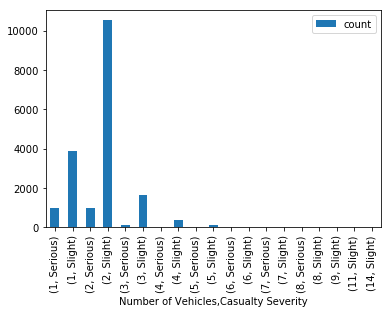

In [44]:
colName = 'Number of Vehicles'
results = df.groupby([colName, 'Casualty Severity'])[colName].agg(['count'])
results.plot.bar()
results

In [6]:
# to learn from this section: what features we may want to engineer in the next section
# e.g. bimodal - split in two bins

In [89]:
# functions to get new features

def getMonth(s):
    return s.split('-')[1]

def getYear(s):
    return 2000 + int(s.split('-')[2])

def getHour(n):
    s = str(n)
    if len(s) == 3:
        return int(s[0])
    elif len(s) == 2:
        return 0
    else:
        return int(s[0:2])

df['month'] = [getMonth(s) for s in df['Accident Date']]
df['year'] = [getYear(s) for s in df['Accident Date']]
df['hour'] = [getHour(n) for n in df['Time (24hr)']]

In [90]:
colName = 'hour'
results = df.groupby([colName, 'Casualty Severity'])['Casualty Severity'].agg('count')

for a,x in results.iteritems():
    print(a)

(0, 'Serious')
(0, 'Slight')
(1, 'Serious')
(1, 'Slight')
(2, 'Serious')
(2, 'Slight')
(3, 'Serious')
(3, 'Slight')
(4, 'Serious')
(4, 'Slight')
(5, 'Serious')
(5, 'Slight')
(6, 'Serious')
(6, 'Slight')
(7, 'Serious')
(7, 'Slight')
(8, 'Serious')
(8, 'Slight')
(9, 'Serious')
(9, 'Slight')
(10, 'Serious')
(10, 'Slight')
(11, 'Serious')
(11, 'Slight')
(12, 'Serious')
(12, 'Slight')
(13, 'Serious')
(13, 'Slight')
(14, 'Serious')
(14, 'Slight')
(15, 'Serious')
(15, 'Slight')
(16, 'Serious')
(16, 'Slight')
(17, 'Serious')
(17, 'Slight')
(18, 'Serious')
(18, 'Slight')
(19, 'Serious')
(19, 'Slight')
(20, 'Serious')
(20, 'Slight')
(21, 'Serious')
(21, 'Slight')
(22, 'Serious')
(22, 'Slight')
(23, 'Serious')
(23, 'Slight')


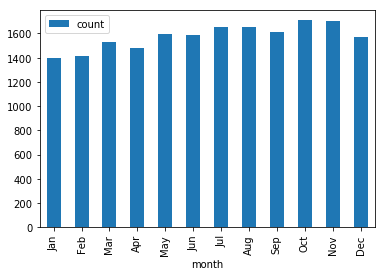

In [91]:
colName = 'month'
monthOrder = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
results = df.groupby(colName)[colName].agg(['count']).loc[monthOrder]
results.plot.bar()

In [112]:
import datetime

monthMap = {'Jan': 1, 'Feb': 2, 'Mar': 3, 'Apr': 4, 'May': 5, 'Jun': 6, 'Jul': 7, 'Aug': 8, 'Sep': 9, 'Oct': 10, 'Nov': 11, 'Dec': 12}
dayMap = {1: 'Mon', 2: 'Tue', 3: 'Wed', 4: 'Thu', 5: 'Fri', 6: 'Sat', 7: 'Sun'}

def getWeekday(s):
    month = monthMap[getMonth(s)]
    year = getYear(s)
    date = int(s.split('-')[0])
    dt = datetime.datetime(year, month, date)
    return dayMap[dt.isoweekday()]

df['weekday'] = [getWeekday(s) for s in df['Accident Date']]

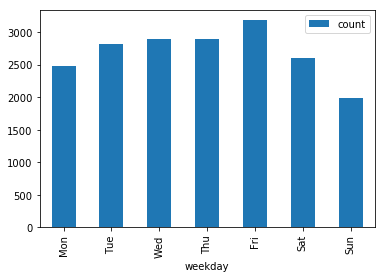

In [114]:
colName = 'weekday'
dayOrder = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
results = df.groupby(colName)[colName].agg(['count']).loc[dayOrder]
results.plot.bar()

## Part 3 - feature engineering (15 mins)

In [11]:
# not all of the existing features in the dataset are going to be useful
# e.g. without map to tie to, lat and long not useful so can exclude

In [81]:
# removing columns we don't want

df = df.drop(columns=['Latitude', 'Longitude', 'Reference Number'])
df

,Number of Vehicles,Accident Date,Time (24hr),1st Road Class,Road Surface,Lighting Conditions,Weather Conditions,Casualty Class,Casualty Severity,Sex of Casualty,Age of Casualty,Type of Vehicle,month,year,hour
0,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,30,Car,Mar,9,23
1,2,14-Mar-09,2330,Unclassified,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Female,20,Car,Mar,9,23
2,1,03-Oct-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,29,Car,Oct,9,6
3,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,17,Car,Nov,9,6
4,4,19-Nov-09,630,A(M),Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,53,Goods vehicle 3.5 tonnes mgw and under,Nov,9,6
5,1,07-Feb-11,128,Motorway,Dry,Darkness: no street lighting,Fine with high winds,Driver/Rider,Slight,Male,39,Goods vehicle 3.5 tonnes mgw and under,Feb,11,1
6,2,07-Jan-14,240,A(M),Wet / Damp,Darkness: no street lighting,Fine with high winds,Driver/Rider,Serious,Male,60,Goods vehicle 7.5 tonnes mgw and over,Jan,14,2
7,2,07-Jan-14,240,A(M),Wet / Damp,Darkness: no street lighting,Fine with high winds,Driver/Rider,Serious,Male,41,Goods vehicle 7.5 tonnes mgw and over,Jan,14,2
8,1,03-Oct-09,2110,Unclassified,Dry,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,Slight,Male,18,Car,Oct,9,21
9,2,11-Apr-11,2100,Unclassified,Dry,Darkness: street lighting unknown,Fine with high winds,Driver/Rider,Slight,Male,31,Pedal cycle,Apr,11,21


In [13]:
# creating better features from existing ones (e.g. weekend vs weekday, day bins)

# some features are useful but not in their current state

In [15]:
# encoding categorical data

# some features are categorical and we need to encode this = one hot encoding!

In [9]:
# normalization not necessary for decision trees but good to know

# in some methods you'll want to standardize numerical features
# example would be to take e.g. age in our model

# find mean and re-do as difference from mean, and visualise here

## Part 4 - training the model

In [16]:
# want to split into appropriate set sizes, train, cv, test etc
# check target class is well-represented in train/test split
# training the model

## Part 5 - visualising the model

In [27]:
# use graphviz and lime to visualise the model and show paths through the tree for new data?

## Part 6 - evaluating the model

In [28]:
# binary classification metrics

# want good examples to demonstrate pros/cons of different metrics

In [29]:
# testing on test data

## Part 7 - enhancing the model

In [30]:
# random forest and ensemble methods

# extending to random forest and explaining significance of new parameters
# general explanation on advantages of ensemble methods# random forest and ensemble methods

In [31]:
# re evaluation on new model